In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from regressao_logistica import RegressaoLogistica
from sklearn.model_selection import train_test_split

In [169]:
dataframe_treino = pd.read_csv('train_reduzido_1_5.csv', sep=';')
dataframe_teste = pd.read_csv('test_reduzido_1_5.csv', sep=';')

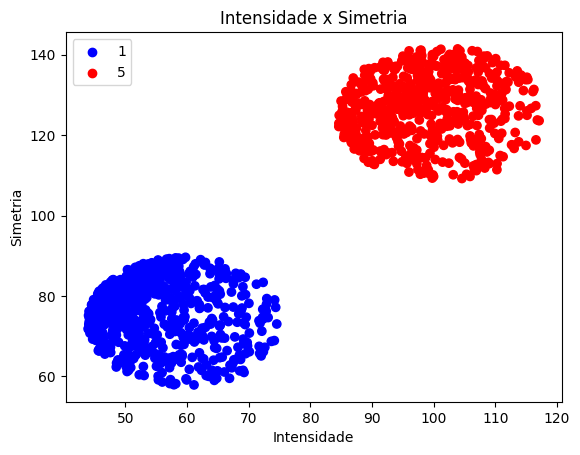

In [170]:
# Plotando o grafico intensidade x simetria do conjunto de treino
cores = {1: 'blue', 5: 'red'}
plt.scatter(dataframe_treino['intensidade'], dataframe_treino['simetria'], c=dataframe_treino['label'].map(cores))
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Intensidade x Simetria')
for label, cor in cores.items():
    plt.scatter([], [], color=cor, label=label)
plt.legend()
plt.show()


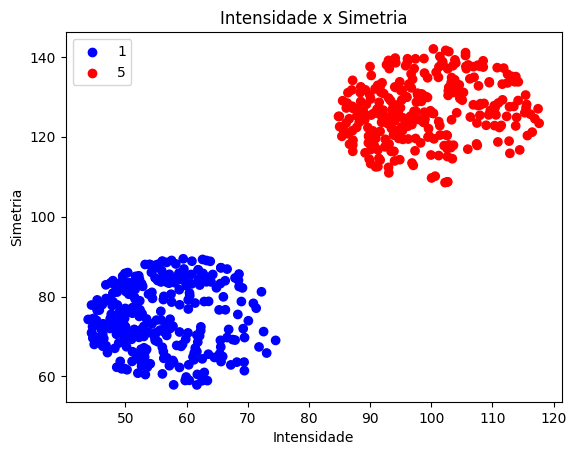

In [171]:
# Plotando o grafico intensidade x simetria do conjunto de teste
cores = {1: 'blue', 5: 'red'}

plt.scatter(dataframe_teste['intensidade'], dataframe_teste['simetria'], c=dataframe_teste['label'].map(cores))
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Intensidade x Simetria')
for label, cor in cores.items():
    plt.scatter([], [], color=cor, label=label)
plt.legend()
plt.show()

In [186]:
from numpy import linalg as LA
from scipy.special import expit
import random


class RegressaoLogistica():
    def __init__(self, eta=0.1, tmax=1000, batch_size=32):
        self.eta = eta
        self.tmax = tmax
        self.batch_size = batch_size

    # Infere o vetor w da funçao hipotese
    #Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
    def fit(self, _X, _y):
        # Normalizando os dados de acordo com o Xmin e xmax
        _X = np.array(_X)
        _X = (_X - _X.min(axis=0)) / (_X.max(axis=0) - _X.min(axis=0))
        X = np.concatenate((np.ones((len(_X),1)), _X), axis=1) # X é uma matriz de amostras que eu adiciono uma coluna de 1s
        y = np.array(_y)
        
        d = X.shape[1] # Quantidade de colunas de X, ou seja, de caracteristicas
        N = X.shape[0] # Quantidade de amostras
        w = np.zeros(d, dtype=float) # Cria um array de zeros com o tamanho do numero de colunas de X
        self.w = []
        
        for i in range(self.tmax):
            vsoma = np.zeros(d, dtype=float)

            #Escolhendo o lote de entradas
            """if self.batch_size < N:
                indices = random.sample(range(N),self.batch_size) # Escolhe aleatoriamente batch_size indices
                batchX = [X[index] for index in indices]
                batchY = [y[index] for index in indices]
            else:
                batchX = X
                batchY = y"""

            #computando o gradiente no ponto atual
            for i in range(N):
                vsoma += (y[i] * X[i]) / (1 + np.exp((y[i] * w).T @ X[i]))

            
            gt = -vsoma/N
            w = w - (self.eta*gt)
            #Condicao de parada: se ||deltaF|| < epsilon (0.0001)
            if LA.norm(gt) < 0.0001 :
                break
        self.w = w
        print("w: ", self.w)
        

    #funcao hipotese inferida pela regressa logistica  
    def predict_prob(self, X):
        X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
        lista = []
        for x in X:
            print("x:", x)
            #print(1 / (1 + np.exp(-(self.w[0] + np.dot(self.w[1:], x)))))
            #lista.append(1 / (1 + np.exp(-(self.w[0] + np.dot(self.w[1:], x)))))
            print(expit(self.w[0] + self.w[1:].T @ x))
            lista.append(expit(self.w[0] + self.w[1:].T @ x))
        return lista
        #return [1 / (1 + np.exp(-(self.w[0] + np.dot(self.w[1:], x)))) for x in X]

    #Predicao por classificação linear
    def predict(self, X):
        lista = []
        for x in X:
            #print(1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x))))
            if (1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) >= 0.5:
                
                lista.append(1)
            else:
                lista.append(-1)
        return lista
        #return [1 if (1 / (1 + np.exp(-(self.w[0] + self.w[1:].T @ x)))) >= 0.5 
                #else -1 for x in X]

    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]


vsoma:  [1744.         1131.65990991 1251.31018301]
vsoma:  [788.73156547 427.17682324 478.56962876]
vsoma:  [560.94235856 263.34946636 298.4529216 ]
vsoma:  [457.40064204 190.80186136 218.53146591]
vsoma:  [397.17637363 149.74641579 173.21546154]
vsoma:  [357.36120679 123.38549632 144.06105631]
vsoma:  [328.85205138 105.08863842 123.78287059]
vsoma:  [307.28361527  91.69597152 108.90681796]
vsoma:  [290.29158061  81.50614812  97.56135207]
vsoma:  [276.48041611  73.52066587  88.64753272]
vsoma:  [264.97178434  67.11455483  81.47720267]
vsoma:  [255.18459409  61.87659172  75.5973608 ]
vsoma:  [246.71876237  57.52516455  70.69765278]
vsoma:  [239.28969476  53.86101633  66.55839434]
vsoma:  [232.68937052  50.73927497  63.01979729]
vsoma:  [226.76220483  48.05216306  59.96294056]
vsoma:  [221.38951893  45.71791072  57.29756439]
vsoma:  [216.47923077  43.67341964  54.95399208]
vsoma:  [211.95882339  41.86927556  52.87763623]
vsoma:  [207.77043388  40.26627597  51.02517308]
vsoma:  [203.8673

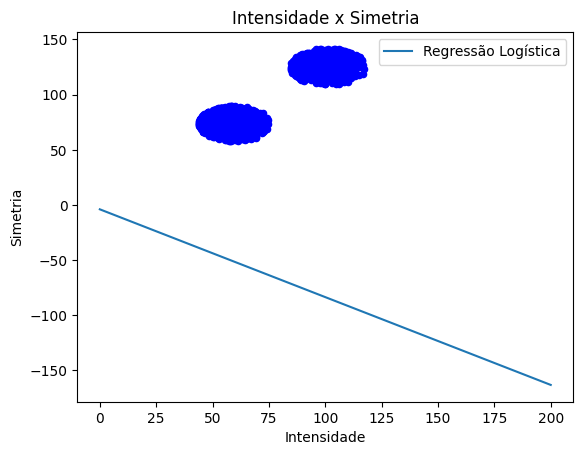

In [187]:
classificador = RegressaoLogistica()
# Transformando os dados X e Y em numpy arrays
X = dataframe_treino[['intensidade', 'simetria']].to_numpy()
X_teste = dataframe_teste[['intensidade', 'simetria']].to_numpy()
y = dataframe_treino['label'].to_numpy()
y_teste = dataframe_teste['label'].to_numpy()
classificador.fit(X, y)
y_pred = classificador.predict_prob(X)
#print("y_pred: ", y_pred)

# Plotando a reta gerada pela regressao logistica
x = np.linspace(0, 200, 1000)
y_plot = classificador.getRegressionY(x)
plt.plot(x, y_plot, label='Regressão Logística')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Intensidade x Simetria')
plt.legend()

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [X[i][0] for i in range(X.shape[0]) if(y_pred[i] >= 0.5)]
yP = [X[i][1] for i in range(X.shape[0]) if(y_pred[i] >= 0.5)]
xN = [X[i][0] for i in range(X.shape[0]) if(y_pred[i] < 0.5)]
yN = [X[i][1] for i in range(X.shape[0]) if(y_pred[i] < 0.5)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Computando o erro dentro da amostra (Ein)
pred = classificador.predict(X)
#print("Pred: ", pred)
errorIN = 0
for pn, yn in zip(pred, y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/X.shape[0] * 100) + "%")

[[9.99999998e-01 2.07270345e-09]
 [9.99981514e-01 1.84862551e-05]
 [9.99999826e-01 1.74447829e-07]
 ...
 [1.48311452e-09 9.99999999e-01]
 [4.85977293e-08 9.99999951e-01]
 [1.20950494e-09 9.99999999e-01]]
Error in : 0.0%
Error out : 0.0%
classifier coef:  [[0.27889094 0.34369422]]
classifier intercept:  [-56.26928457]
[1.]
[1.20950494e-09]


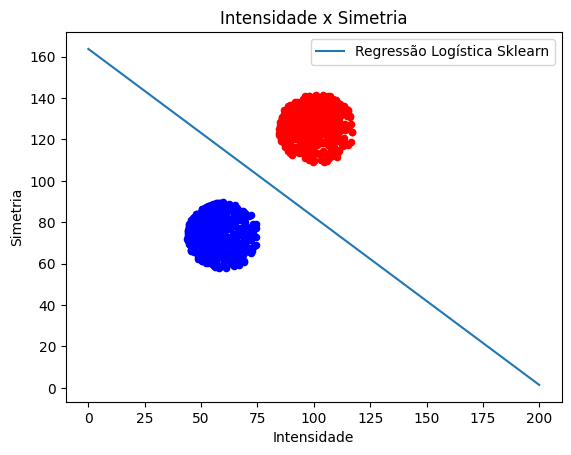

In [174]:
from sklearn.linear_model import LogisticRegression
N = X.shape[0]
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X, y) 

#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_proba(X)
print(pred)
pred_2 = classifier.predict_proba(X_teste)


#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(X)
pred_2 = classifier.predict(X_teste)



errorIN = 0
for pn, yn in zip(pred, y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/X.shape[0] * 100) + "%")

#Computando o erro fora da amostra (Eout)
for pn, yn in zip(pred_2, dataframe_teste['label']):
  if(pn != yn):
    errorIN += 1

print("Error out : " + str(errorIN/X_teste.shape[0] * 100) + "%")

# Construindo uma reta que separe os pontos de acordo com a classificação da Regressão Logística
w = classifier.coef_[0]
w0 = classifier.intercept_
x = np.linspace(0, 200, 1000)
y_plot = (-w0 - w[0]*x) / w[1]
plt.plot(x, y_plot, label='Regressão Logística Sklearn')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Intensidade x Simetria')
plt.legend()

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [X[i][0] for i in range(X.shape[0]) if(pred[i] == 1)]
yP = [X[i][1] for i in range(X.shape[0]) if(pred[i] == 1)]
xN = [X[i][0] for i in range(X.shape[0]) if(pred[i] == 5)]
yN = [X[i][1] for i in range(X.shape[0]) if(pred[i] == 5)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

# Agora aumente a escala da reta para que ela separe os pontos de acordo com a classificação da Regressão Logística
print("classifier coef: ", classifier.coef_)
print("classifier intercept: ", classifier.intercept_)

print(expit(w0 + w.T @ X[-1]))
print(1-expit(w0 + w.T @ X[-1]))



In [175]:
print(w)
print(w0)
print(w_teste)
# calculando o erro de entropia cruzada

[0.27889094 0.34369422]
[-56.26928457]
[ 0.125      10.8805576  14.52723039]
